<a href="https://colab.research.google.com/github/buriro-ezekia/Data-Science-Project-Portfolios/blob/main/Buriro_Ezekia_Marketing_Campaign_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Read the csv datasets in pandas

import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file in Google Drive or local directory
df = pd.read_csv('/content/Order_Data_meriskill.csv')

# Print the first 5 rows of the DataFrame
print(df.head())


   OrderID          Region         Country CustID    Customer_Name  \
0  SO45080       Northwest   United States  14657      JOHN THOMAS   
1  SO45079       Southwest   United States  29255  KYLE WASHINGTON   
2  SO45082       Australia       Australia  11455        ROSS SANZ   
3  SO45081          Canada          Canada  26782       SETH LEWIS   
4  SO45083  United Kingdom  United Kingdom  14947   ALEJANDRO CHEN   

   ProductSKU Product_Category  OrderLineItem  OrderQuantity  ProductCost  \
0  BK-R50B-58           Plants            1.0            1.0     413.1463   
1  BK-R93R-48           Plants            1.0            1.0    2171.2942   
2  BK-M82B-44           Plants            1.0            1.0    1898.0944   
3  BK-R50B-44           Plants            1.0            1.0     413.1463   
4  BK-R93R-48           Plants            1.0            1.0    2171.2942   

  ProductPrice   OrderDate AcquisitionSource      TransactionID  Fraud  \
0     699.0982  01-01-2020        Meta-ads

<ipython-input-2-3a85dbec5a6b>:6: DtypeWarning: Columns (3,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Order_Data_meriskill.csv')


In [3]:
df.columns

Index(['OrderID', 'Region', 'Country', 'CustID', 'Customer_Name', 'ProductSKU',
       'Product_Category', 'OrderLineItem', 'OrderQuantity', 'ProductCost',
       'ProductPrice', 'OrderDate', 'AcquisitionSource', 'TransactionID',
       'Fraud', 'PaymentMethod', 'CardType', 'Gender'],
      dtype='object')

In [4]:
# Handling Missing values

df.isnull().sum()


,0
OrderID,0
Region,1
Country,1
CustID,1
Customer_Name,4
ProductSKU,1
Product_Category,1
OrderLineItem,1
OrderQuantity,1
ProductCost,1


In [5]:
# Remove Duplicates

df.drop_duplicates(inplace=True)


In [6]:
# Fix Inconsistent Data
df['OrderDate'] = pd.to_datetime(df['OrderDate'], dayfirst=True, errors='coerce')



In [7]:
# Handling Incorrect Formats
invalid_dates = df[df['OrderDate'].isna()]
print(invalid_dates)  # Review the rows with invalid dates


       OrderID  Region Country CustID Customer_Name          ProductSKU  \
7466   SO52614  France  France      R       WB-H098  Plant Care & Seeds   
46971  SO70321     NaN     NaN    NaN           NaN                 NaN   

      Product_Category  OrderLineItem  OrderQuantity  ProductCost  \
7466                 3            2.0         1.8663         4.99   
46971              NaN            NaN            NaN          NaN   

      ProductPrice OrderDate AcquisitionSource      TransactionID  Fraud  \
7466    16-08-2021       NaT               NaN  E3514276256212068  False   
46971          NaN       NaT               NaN                NaN    NaN   

      PaymentMethod CardType Gender  
7466     CREDITCARD     VISA      M  
46971           NaN      NaN    NaN  


In [8]:
df.dropna(subset=['OrderDate'], inplace=True)


# Profitability Calculation

In [9]:
import pandas as pd

# Assuming your dataframe is loaded into df

# 1. Convert 'ProductPrice' and 'ProductCost' to numeric (float), coercing errors
df['ProductPrice'] = pd.to_numeric(df['ProductPrice'], errors='coerce')
df['ProductCost'] = pd.to_numeric(df['ProductCost'], errors='coerce')

# 2. Handle any NaN values that result from non-numeric values (optional)
# You can either drop rows with NaN in 'ProductPrice' or 'ProductCost' columns:
df.dropna(subset=['ProductPrice', 'ProductCost'], inplace=True)

# 3. Calculate Profit for Each Order
# Profit = ProductPrice - ProductCost
df['Profit'] = df['ProductPrice'] - df['ProductCost']

# 4. Group by Campaign (AcquisitionSource) and Customer (CustID)
campaign_profit = df.groupby(['AcquisitionSource', 'CustID']).agg(
    total_profit_per_user=('Profit', 'sum')
).reset_index()

# 5. Calculate Per-User Profitability for Each Campaign
campaign_profitability = campaign_profit.groupby('AcquisitionSource').agg(
    total_profit=('total_profit_per_user', 'sum'),
    total_users=('CustID', 'nunique')
).reset_index()

# 6. Calculate profitability per user
campaign_profitability['profitability_per_user'] = campaign_profitability['total_profit'] / campaign_profitability['total_users']

# 7. Output the result
print(campaign_profitability)


  AcquisitionSource  total_profit  total_users  profitability_per_user
0      Google-ads\r  7.201586e+06        16296              441.923544
1        Meta-ads\r  9.303225e+05         4156              223.850448
2     Yt-Campaign\r  8.939341e+05         4167              214.527017


# Campaign Comparison

In [10]:
import pandas as pd

# Assuming your dataframe 'df' is loaded and cleaned

# Step 1: Convert 'ProductPrice' and 'ProductCost' to numeric to ensure correct data types
# This step ensures we can perform arithmetic operations on these columns
df['ProductPrice'] = pd.to_numeric(df['ProductPrice'], errors='coerce')
df['ProductCost'] = pd.to_numeric(df['ProductCost'], errors='coerce')

# Step 2: Handle any NaN values that result from non-numeric values (optional)
# Here, we drop any rows where 'ProductPrice' or 'ProductCost' is NaN
df.dropna(subset=['ProductPrice', 'ProductCost'], inplace=True)

# Step 3: Calculate Profit for Each Order
# Profit = ProductPrice - ProductCost
df['Profit'] = df['ProductPrice'] - df['ProductCost']

# Step 4: Group by Campaign (AcquisitionSource) and Customer (CustID)
# We calculate total profit per user by grouping based on campaign and user
campaign_profit = df.groupby(['AcquisitionSource', 'CustID']).agg(
    total_profit_per_user=('Profit', 'sum')
).reset_index()

# Step 5: Calculate Campaign Profitability Metrics
# Now group by 'AcquisitionSource' to calculate total profit and total users for each campaign
campaign_profitability = campaign_profit.groupby('AcquisitionSource').agg(
    total_profit=('total_profit_per_user', 'sum'),  # Total profit from all users for each campaign
    total_users=('CustID', 'nunique')  # Count of unique users per campaign
).reset_index()

# Step 6: Calculate profitability per user for each campaign
campaign_profitability['profitability_per_user'] = campaign_profitability['total_profit'] / campaign_profitability['total_users']

# Step 7: Compare Campaigns by Sorting based on Profitability per User
# We sort by 'profitability_per_user' in descending order to identify the best campaigns
campaign_comparison = campaign_profitability.sort_values(by='profitability_per_user', ascending=False)

# Step 8: Display the best campaign
best_campaign = campaign_comparison.iloc[0]  # First row will have the highest profitability per user

print("Best Campaign:")
print(best_campaign)


Best Campaign:
AcquisitionSource         Google-ads\r
total_profit              7201586.0793
total_users                      16296
profitability_per_user      441.923544
Name: 0, dtype: object


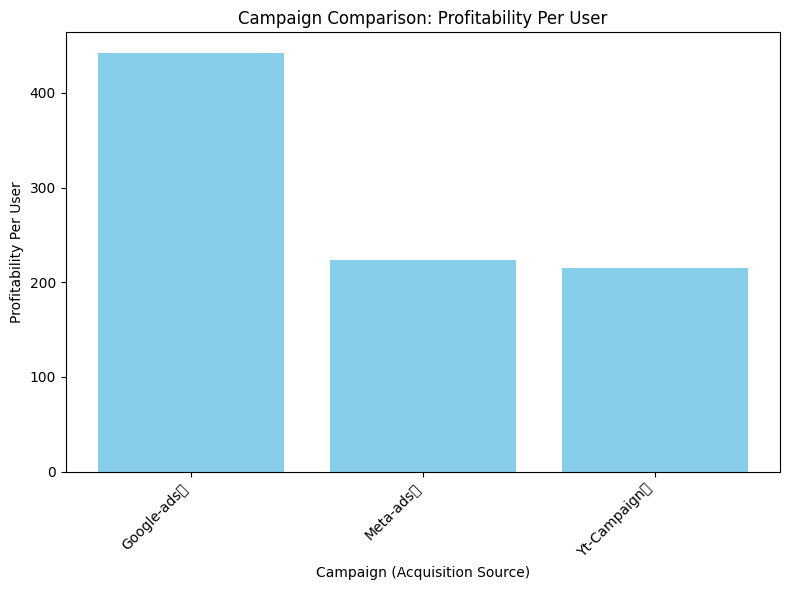

In [11]:
# Optional Step: Visualise campaign performance
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

# Create a bar chart for profitability per user for each campaign
plt.figure(figsize=(8, 6))
plt.bar(campaign_comparison['AcquisitionSource'], campaign_comparison['profitability_per_user'], color='skyblue')
plt.xlabel('Campaign (Acquisition Source)')
plt.ylabel('Profitability Per User')
plt.title('Campaign Comparison: Profitability Per User')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Conversion Rate and CAC Analysis

In [12]:
import pandas as pd

# Assuming 'df' is your cleaned dataset and that you have an additional column 'Total_Acquisition_Cost'

# Step 1: Mark Successful Transactions (where Fraud is not true/1)
df['Successful_Transaction'] = df['Fraud'].apply(lambda x: 1 if x == 0 else 0)

# Step 2: Group by 'AcquisitionSource' to Calculate Total Customers and Successful Transactions
conversion_data = df.groupby('AcquisitionSource').agg(
    total_customers=('CustID', 'nunique'),  # Count of unique customers
    successful_transactions=('Successful_Transaction', 'sum')  # Sum of successful transactions (non-fraudulent)
).reset_index()

In [20]:
# # Display informations in AcquisitionSource column
# print(df['AcquisitionSource'].unique())

In [19]:
# Create a Total_Acquisition_Cost
import pandas as pd

# Load the dataset from the specified CSV file
# df = pd.read_csv('/content/Order_Data_meriskill.csv')

# Step 1: Strip whitespace characters from the AcquisitionSource column
df['AcquisitionSource'] = df['AcquisitionSource'].str.strip()

# Step 2: Check the unique values in the cleaned AcquisitionSource column
unique_sources = df['AcquisitionSource'].unique()
print("Unique Acquisition Sources after stripping whitespace:")
print(unique_sources)

# Step 3: Define hypothetical acquisition costs per acquisition source
acquisition_costs = {
    'Meta-ads': 1000,      # Updated key for Meta-ads
    'Google-ads': 1500,    # Updated key for Google-ads
    'Yt-Campaign': 2000     # Updated key for Yt-Campaign
}

# Step 4: Create a new column 'Total_Acquisition_Cost' based on 'AcquisitionSource'
df['Total_Acquisition_Cost'] = df['AcquisitionSource'].map(acquisition_costs)

# Step 5: Check for NaN values after the update
nan_values = df[df['Total_Acquisition_Cost'].isna()]
print("Rows with NaN Total_Acquisition_Cost:")
print(nan_values)

# Display the updated DataFrame to verify the new column
print(df.head())



Unique Acquisition Sources after stripping whitespace:
['Meta-ads' 'Google-ads' 'Yt-Campaign']
Rows with NaN Total_Acquisition_Cost:
Empty DataFrame
Columns: [OrderID, Region, Country, CustID, Customer_Name, ProductSKU, Product_Category, OrderLineItem, OrderQuantity, ProductCost, ProductPrice, OrderDate, AcquisitionSource, TransactionID, Fraud, PaymentMethod, CardType, Gender, Profit, Successful_Transaction, Total_Acquisition_Cost]
Index: []

[0 rows x 21 columns]
   OrderID          Region         Country CustID    Customer_Name  \
0  SO45080       Northwest   United States  14657      JOHN THOMAS   
1  SO45079       Southwest   United States  29255  KYLE WASHINGTON   
2  SO45082       Australia       Australia  11455        ROSS SANZ   
3  SO45081          Canada          Canada  26782       SETH LEWIS   
4  SO45083  United Kingdom  United Kingdom  14947   ALEJANDRO CHEN   

   ProductSKU Product_Category  OrderLineItem  OrderQuantity  ProductCost  \
0  BK-R50B-58           Plants   

In [21]:
# Step 3: Calculate Conversion Rate for each Acquisition Source
conversion_data['conversion_rate'] = (conversion_data['successful_transactions'] / conversion_data['total_customers']) * 100

# Step 4: Calculate CAC (Customer Acquisition Cost)
# Assuming a 'Total_Acquisition_Cost' column per Acquisition Source exists in the dataset
# You need to ensure the 'Total_Acquisition_Cost' is added to the dataset
conversion_data['Total_Acquisition_Cost'] = df.groupby('AcquisitionSource')['Total_Acquisition_Cost'].first().values

# Calculate CAC by dividing total acquisition cost by the number of converted (successful) customers
conversion_data['CAC'] = conversion_data['Total_Acquisition_Cost'] / conversion_data['successful_transactions']

# Step 5: Display the final Conversion Rate and CAC data
print(conversion_data[['AcquisitionSource', 'conversion_rate', 'CAC']])


  AcquisitionSource  conversion_rate       CAC
0      Google-ads\r       216.114384  0.042592
1        Meta-ads\r       107.507218  0.223814
2     Yt-Campaign\r       108.519318  0.442282


# Key Performance Indicators (KPIs)

In [23]:
# Identify KPIs based on the above information

# Calculate Total Revenue
df['Total_Revenue'] = df['ProductPrice'] * df['OrderQuantity']
total_revenue = df['Total_Revenue'].sum()

# Calculate Average Order Value (AOV)
total_orders = df['OrderID'].nunique()  # Unique Order IDs for total orders
average_order_value = total_revenue / total_orders if total_orders > 0 else 0

# Calculate Total Cost (Assuming Product Cost is also a relevant cost)
df['Total_Product_Cost'] = df['ProductCost'] * df['OrderQuantity']
total_product_cost = df['Total_Product_Cost'].sum()

# Calculate Total Profit
total_acquisition_cost = df['Total_Acquisition_Cost'].sum()
total_profit = total_revenue - (total_product_cost + total_acquisition_cost)

# Calculate Profit Margin
profit_margin = (total_profit / total_revenue) * 100 if total_revenue > 0 else 0

# Calculate Customer Acquisition Cost (CAC)
# Assuming each AcquisitionSource corresponds to a unique customer
new_customers = df['CustID'].nunique()
cac = total_acquisition_cost / new_customers if new_customers > 0 else 0

# Calculate Conversion Rate
# Assuming a conversion happens when an order is placed
total_visitors = df['CustID'].nunique()  # Unique customers as visitors
conversion_rate = (total_orders / total_visitors) * 100 if total_visitors > 0 else 0

# Calculate Click-Through Rate (CTR) (Assuming you have data on impressions and clicks)
# For this example, assume you have these columns. If not, adjust accordingly.
# df['Clicks'] = [example_click_data]  # Replace with actual click data
# df['Impressions'] = [example_impression_data]  # Replace with actual impression data
# ctr = (df['Clicks'].sum() / df['Impressions'].sum()) * 100 if df['Impressions'].sum() > 0 else 0



In [24]:
# Display the calculated KPIs
print(f"Total Revenue: {total_revenue}")
print(f"Average Order Value (AOV): {average_order_value:.2f}")
print(f"Total Acquisition Cost: {total_acquisition_cost:.2f}")
print(f"Total Product Cost: {total_product_cost:.2f}")
print(f"Total Profit: {total_profit:.2f}")
print(f"Profit Margin: {profit_margin:.2f}%")
print(f"Customer Acquisition Cost (CAC): {cac:.2f}")
print(f"Conversion Rate: {conversion_rate:.2f}%")
# print(f"Click-Through Rate (CTR): {ctr:.2f}%")  # Uncomment if you have clicks and impressions data

Total Revenue: 21900213.558299996
Average Order Value (AOV): 1015.73
Total Acquisition Cost: 70468000.00
Total Product Cost: 12717028.61
Total Profit: -61284815.05
Profit Margin: -279.84%
Customer Acquisition Cost (CAC): 4042.68
Conversion Rate: 123.69%
